In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import numpy as np
import os
from PIL import Image
# 이미지 처리 
from keras.preprocessing import image

In [2]:
import cv2
from random import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob as gb
from tensorflow.keras.utils import to_categorical

## 파일 경로

In [3]:
base_dir = './Data' # 기본경로
train_dir = os.path.join(base_dir, 'train') # 학습 데이터 경로
test_dir = os.path.join(base_dir, 'test') # 테스트 데이더 경로
p_train_dir = os.path.join(base_dir, 'p_train') # 추가학습 데이터 경로  # 으로 다 합침
p_test_dir = os.path.join(base_dir, 'p_test') # 추가학습 데이터 경로  # 으로 다 합침


# 학습 사진
train_covid_dir = os.path.join(train_dir, 'COVID19')
train_normal_dir = os.path.join(train_dir, 'NORMAL')
train_pneum_dir = os.path.join(train_dir, 'PNEUMONIA')

# 추가 학습 사진
p_train_covid_dir = os.path.join(p_train_dir, 'COVID19')
p_train_normal_dir = os.path.join(p_train_dir, 'NORMAL')
p_train_pneum_dir = os.path.join(p_train_dir, 'PNEUMONIA')

# 테스트  사진
test_covid_dir = os.path.join(test_dir, 'COVID19')
test_normal_dir = os.path.join(test_dir, 'NORMAL')
test_pneum_dir = os.path.join(test_dir, 'PNEUMONIA')

# 추가 테스트 사진

p_test_covid_dir = os.path.join(p_test_dir, 'COVID19')
p_test_normal_dir = os.path.join(p_test_dir, 'NORMAL')
p_test_pneum_dir = os.path.join(p_test_dir, 'PNEUMONIA')

In [4]:
# 제대로 경로 지정 됐는지 확인
train_covid_fname = os.listdir(train_covid_dir)
train_normal_fname = os.listdir(train_normal_dir)
train_pneum_fname = os.listdir(train_pneum_dir)

test_covid_fname = os.listdir(test_covid_dir)
test_normal_fname = os.listdir(test_normal_dir)
test_pneum_fname = os.listdir(test_pneum_dir)

p_train_covid_fname = os.listdir(p_train_covid_dir)
p_train_normal_fname = os.listdir(p_train_normal_dir)
p_train_pneum_fname = os.listdir(p_train_pneum_dir)

p_test_covid_fname = os.listdir(p_test_covid_dir)
p_test_normal_fname = os.listdir(p_test_normal_dir)
p_test_pneum_fname = os.listdir(p_test_pneum_dir)

print(train_covid_fname[:10]) # 열개만 확인
print(train_normal_fname[:10])
print(p_train_normal_fname[:10])

['COVID19(0).jpg', 'COVID19(1).jpg', 'COVID19(10).jpg', 'COVID19(101).jpg', 'COVID19(102).jpg', 'COVID19(103).jpg', 'COVID19(104).jpg', 'COVID19(105).jpg', 'COVID19(107).jpg', 'COVID19(108).jpg']
['NORMAL(0).jpg', 'NORMAL(1).jpg', 'NORMAL(100).jpg', 'NORMAL(1000).jpg', 'NORMAL(1002).jpg', 'NORMAL(1005).jpg', 'NORMAL(1006).jpg', 'NORMAL(1007).jpg', 'NORMAL(1008).jpg', 'NORMAL(1009).jpg']
['NORMAL(0).jpg', 'NORMAL(1).jpg', 'NORMAL(100).jpg', 'NORMAL(1000).jpg', 'NORMAL(1002).jpg', 'NORMAL(1005).jpg', 'NORMAL(1006).jpg', 'NORMAL(1007).jpg', 'NORMAL(1008).jpg', 'NORMAL(1009).jpg']


In [7]:
# train 및 test 디렉토리에서 코로나, 정상, 폐렴의 이미지 총 수를 알아보기
print("전체 학습용 코로나 이미지 개수는: ", len(os.listdir(train_covid_dir)))
print("전체 학습용 정상 이미지 개수는: ", len(os.listdir(train_normal_dir)))
print("전체 학습용 폐렴 이미지 개수는: ", len(os.listdir(train_pneum_dir)))

print("-----------------------------------------------------")

print("전체 테스트용 코로나 이미지 개수는: ", len(os.listdir(test_covid_dir)))
print("전체 테스트용 정상 이미지 개수는: ", len(os.listdir(test_normal_dir)))
print("전체 테스트용 폐렴 이미지 개수는: ", len(os.listdir(test_pneum_dir)))

print("-----------------------------------------------------")
print("전체 추가 학습용 코로나 이미지 개수는: ", len(os.listdir(p_train_covid_dir)))
print("전체 추가 학습용 정상 이미지 개수는: ", len(os.listdir(p_train_normal_dir)))
print("전체 추가 학습용 폐렴 이미지 개수는: ", len(os.listdir(p_train_pneum_dir)))

print("-----------------------------------------------------")

print("전체 추가 테스트용 코로나 이미지 개수는: ", len(os.listdir(p_test_covid_dir)))
print("전체 추가 테스트용 정상 이미지 개수는: ", len(os.listdir(p_test_normal_dir)))
print("전체 추가 테스트용 폐렴 이미지 개수는: ", len(os.listdir(p_test_pneum_dir)))



전체 학습용 코로나 이미지 개수는:  460
전체 학습용 정상 이미지 개수는:  1266
전체 학습용 폐렴 이미지 개수는:  3418
-----------------------------------------------------
전체 테스트용 코로나 이미지 개수는:  116
전체 테스트용 정상 이미지 개수는:  317
전체 테스트용 폐렴 이미지 개수는:  855
-----------------------------------------------------
전체 추가 학습용 코로나 이미지 개수는:  6857
전체 추가 학습용 정상 이미지 개수는:  7644
전체 추가 학습용 폐렴 이미지 개수는:  9788
-----------------------------------------------------
전체 추가 테스트용 코로나 이미지 개수는:  2423
전체 추가 테스트용 정상 이미지 개수는:  2565
전체 추가 테스트용 폐렴 이미지 개수는:  3099


In [8]:
Labels = {'NORMAL':0,'PNEUMONIA':1,'COVID19':2}

def getCode(label):
    return Labels[label]

def getLabel(n):
    for x,c in Labels.items():
        if n==c:
            return x
        
print(getCode('COVID19'))
print(getLabel(1))

2
PNEUMONIA


In [9]:
import glob as gb
import cv2
import random

sizeImage = 224

def train_getData(Dir,sizeImage):
    X=[]
    y=[]
    for folder in os.listdir(Dir) :
        files = gb.glob(pathname = str(Dir + '/' + folder + '//*.jpg'))
        random.shuffle(files)
        for num in range(2500) :
            picture = cv2.imread(files[num])
            img = cv2.resize(picture,(sizeImage,sizeImage))
            #img = cv2.GaussianBlur(imageArray,(5,5),0)
            X.append(list(img))
            y.append(getCode(folder))
    X = np.array(X)
    y = np.array(y)
    
    return X,y

def test_getData(Dir,sizeImage):
    X=[]
    y=[]
    for folder in os.listdir(Dir) :
        files = gb.glob(pathname = str(Dir + '/' + folder + '//*.jpg'))
        random.shuffle(files)
        for num in range(625) :
            picture = cv2.imread(files[num])
            img = cv2.resize(picture,(sizeImage,sizeImage))
            #img = cv2.GaussianBlur(imageArray,(5,5),0)
            X.append(list(img))
            y.append(getCode(folder))
    X = np.array(X)
    y = np.array(y)
    
    return X,y

In [10]:
X_train, y_train = train_getData(p_train_dir,sizeImage)
X_test,y_test = test_getData(p_test_dir,sizeImage)

## 데이터 셔플

In [11]:
tmp_train = [[x,y] for x, y in zip(X_train, y_train)]
tmp_test = [[x,y] for x, y in zip(X_test, y_test)]

import random
random.shuffle(tmp_train)
random.shuffle(tmp_test)

X_train = [n[0] for n in tmp_train]
y_train = [n[1] for n in tmp_train]

X_test = [n[0] for n in tmp_test]
y_test = [n[1] for n in tmp_test]

# 리스트에서 배열로
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [12]:
print("X_train Shape : ",X_train.shape)
print("X_test Shape : ",X_test.shape)

X_train Shape :  (7500, 224, 224, 3)
X_test Shape :  (1875, 224, 224, 3)


In [11]:
#X_train = X_train / 255.0
#X_test = X_test / 255.0


In [20]:
print(X_train.shape, X_test.shape)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
print(X_train.shape,X_test.shape)

(1440000, 28, 28, 1) (360000, 28, 28, 1)
(1440000, 28, 28, 1) (360000, 28, 28, 1)


# 합성곱 신경망을 활용한 이미지 판별 

In [13]:
model= tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(224,224,3),kernel_size=(3,3),filters = 50,strides = (1,1),padding='same',activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 50,strides = (1,1), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides = (2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 50,strides = (1,1), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 50,strides = (1,1), padding='same', activation='relu'),

    tf.keras.layers.MaxPool2D(strides = (2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 50,strides = (1,1), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 50,strides = (1,1), padding='same', activation='relu'),

    tf.keras.layers.MaxPool2D(strides = (2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=50, activation = 'relu'),

    tf.keras.layers.Dense(units=3, activation = 'softmax')
])

In [14]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 50)      1400      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 50)      22550     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 50)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 50)      22550     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 50)      22550     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 50)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 50)        2

In [15]:
history = model.fit(X_train,y_train,
                    epochs=30,
                    validation_split=0.25,
                    callbacks = [tf.keras.callbacks.EarlyStopping(patience = 5, monitor = 'val_loss')])

Epoch 1/30
176/176 [==============================] - 49s 280ms/step - loss: 1.3422 - accuracy: 0.7660 - val_loss: 0.3364 - val_accuracy: 0.8912
Epoch 2/30
176/176 [==============================] - 49s 279ms/step - loss: 0.3608 - accuracy: 0.8731 - val_loss: 0.3261 - val_accuracy: 0.8907
Epoch 3/30
176/176 [==============================] - 50s 284ms/step - loss: 0.2775 - accuracy: 0.8978 - val_loss: 0.2918 - val_accuracy: 0.9088
Epoch 4/30
176/176 [==============================] - 50s 286ms/step - loss: 0.2428 - accuracy: 0.9131 - val_loss: 0.2540 - val_accuracy: 0.9173
Epoch 5/30
176/176 [==============================] - 51s 288ms/step - loss: 0.2202 - accuracy: 0.9170 - val_loss: 0.2844 - val_accuracy: 0.9061
Epoch 6/30
176/176 [==============================] - 51s 291ms/step - loss: 0.1360 - accuracy: 0.9529 - val_loss: 0.2888 - val_accuracy: 0.9136
Epoch 7/30
176/176 [==============================] - 51s 291ms/step - loss: 0.1085 - accuracy: 0.9614 - val_loss: 0.2232 - val_ac

In [ ]:
#model.save('M1_NoGauss_E_30_ImageNet.h5')

## 정확도 및 손실값에 대한 결과 시각화

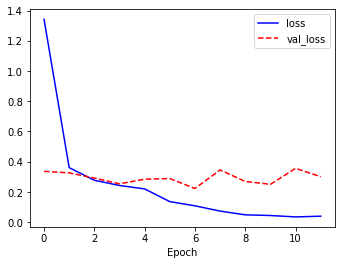

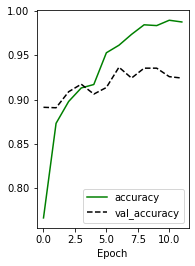

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label = 'loss')
plt.plot(history.history['val_loss'],'r--',label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label = 'accuracy')
plt.plot(history.history['val_accuracy'],'k--',label = 'val_accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [17]:
# 최종평가
model.evaluate(X_test,y_test)

59/59 [==============================] - 4s 60ms/step - loss: 0.2996 - accuracy: 0.9301


[0.2995995879173279, 0.9301333427429199]

# VGG를 활용한 이미지 판별 

In [28]:
model= tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(224,224,3),kernel_size=(3,3),filters=16,padding='same',activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters=32,padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(strides = (2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 64, padding = 'valid', activation='relu'),
    tf.keras.layers.MaxPool2D(strides = (2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(units=32, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(units=10, activation = 'softmax')
])

In [29]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 224, 224, 16)      448       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 224, 224, 32)      4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 112, 112, 32)      9248      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 110, 110, 64)      18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 55, 55, 64)       

In [30]:
history = model.fit(X_train,y_train,
                    epochs=30,
                    validation_split=0.25,
                    callbacks = [tf.keras.callbacks.EarlyStopping(patience = 5, monitor = 'val_loss')])

Epoch 1/30
176/176 [==============================] - 20s 113ms/step - loss: 22.1207 - accuracy: 0.3291 - val_loss: 2.0268 - val_accuracy: 0.3285
Epoch 2/30
176/176 [==============================] - 19s 107ms/step - loss: 1.9106 - accuracy: 0.3319 - val_loss: 1.7979 - val_accuracy: 0.3285
Epoch 3/30
176/176 [==============================] - 19s 109ms/step - loss: 1.7195 - accuracy: 0.3307 - val_loss: 1.6258 - val_accuracy: 0.3285
Epoch 4/30
176/176 [==============================] - 20s 111ms/step - loss: 1.5848 - accuracy: 0.3260 - val_loss: 1.5017 - val_accuracy: 0.3285
Epoch 5/30
176/176 [==============================] - 20s 112ms/step - loss: 1.4822 - accuracy: 0.3392 - val_loss: 1.4117 - val_accuracy: 0.3285
Epoch 6/30
176/176 [==============================] - 20s 113ms/step - loss: 1.4091 - accuracy: 0.3404 - val_loss: 1.3457 - val_accuracy: 0.3285
Epoch 7/30
176/176 [==============================] - 20s 114ms/step - loss: 1.3561 - accuracy: 0.3396 - val_loss: 1.2969 - val_a

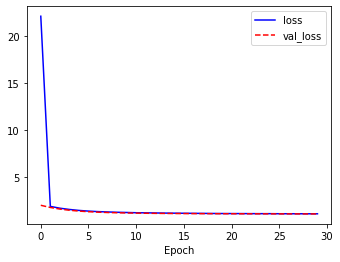

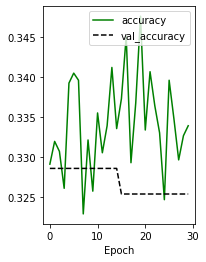

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label = 'loss')
plt.plot(history.history['val_loss'],'r--',label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label = 'accuracy')
plt.plot(history.history['val_accuracy'],'k--',label = 'val_accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [32]:
# 최종평가
model.evaluate(X_test,y_test)

59/59 [==============================] - 1s 24ms/step - loss: 1.1107 - accuracy: 0.3333


[1.1106986999511719, 0.3333333432674408]